In [1]:
import os
import sys
import shutil
import dotenv
from   dotenv import find_dotenv, load_dotenv
import matplotlib
load_dotenv(find_dotenv())
PATH_P     = os.environ['PATH_P']
os.chdir(PATH_P)
sys.path.insert(0, PATH_P)
import seaborn as sns
import pandas as pd
from src.dst.outputhandler.pickle import tic,toc,pickle_save_,pickle_load
from src.dst.plots.plots import plotting_tool,retrieve_data
from src.visualization.vis_LSTM_p.main import main_visualize

import matplotlib.pyplot as plt

In [2]:
def seg_english(key):


    if key == 'gooien':
        key = 'throwing'

    if key == 'sneaky':
        key = 'sneaky'

    if key == 'onder':
        key = 'under'

    if key == 'boven':
        key = 'above'

    if key == 'muren':
        key = 'walls'

    if key == 'object':
        key = 'object'

    return key

In [5]:
path                                    =  './models/segmentated_shuffle/bayes_opt/DEEP2/'
RD                                      = retrieve_data()
data_s,dict_,path_best,hist_nd,hist_d   = RD.get_best(path)
data_s['df_t_val_train']                = pd.concat([data_s['df_t_train'],data_s['df_t_val']])
dict_time                               = pickle_load(path+'dict_BO.p',None)

val_loss_a                              = RD.get_all(path,'val_f')

str_list                                = data_s['path_o'].split('/')
data_s['path_o']                        =  './models/segmentated_shuffle/bayes_opt/DEEP2/'+str_list[-2]+'/'
dict_['AUC_v']                          = data_s['AUC_v']
RD.print_dict(dict_)
BO_vis                                  = plotting_tool(dict_)

'NoneType' object is not callable
'NoneType' object is not callable
'NoneType' object is not callable
'NoneType' object is not callable
'NoneType' object is not callable
lr           : 0.001267345303142497
time_dim     : 20
encoder      : [240, 443]
decoder      : [470]
vector       : 240
AUC_v        : 0.7134902394733854


In [6]:
groupby = 'segmentation'
dict_data = BO_vis._get_data_segmented(data_s,groupby)

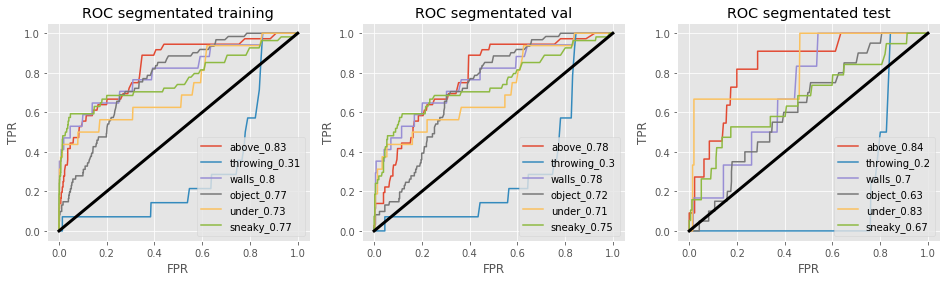

In [8]:
path = dict_data['path_o']


fig = plt.figure(figsize=(16, 4))


ax2 = plt.subplot(131)
for key in dict_data['dict_train'].keys():
    data = dict_data['dict_train'][key]
    ax2.plot(data[1], data[2], label=seg_english(key) + '_' + str(round(data[0], 2)))
ax2.plot([0,1],color = 'k',linewidth=3.0)

plt.legend(loc='lower right')
plt.title('ROC segmentated training')
plt.xlabel('FPR')
plt.ylabel('TPR')

ax3 = plt.subplot(132)
for key in dict_data['dict_val'].keys():
    data = dict_data['dict_val'][key]
    ax3.plot(data[1], data[2], label=seg_english(key) + '_' + str(round(data[0], 2)))
ax3.plot([0,1],color = 'k',linewidth=3.0 )

plt.legend(loc='lower right')
plt.title('ROC segmentated val')
plt.xlabel('FPR')
plt.ylabel('TPR')

ax4 = plt.subplot(133)
for key in dict_data['dict_test'].keys():
    data = dict_data['dict_test'][key]
    ax4.plot(data[1], data[2], label=seg_english(key) + '_' + str(round(data[0], 2)))
ax4.plot([0,1],color = 'k',linewidth=3.0 )

plt.legend(loc='lower right')
plt.title('ROC segmentated test')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.savefig('./plots/AFE/segmented_'+groupby+'.png',bbox_inches="tight")
plt.show()

In [9]:
groupby = 'location'
dict_data = BO_vis._get_data_segmented(data_s,groupby)

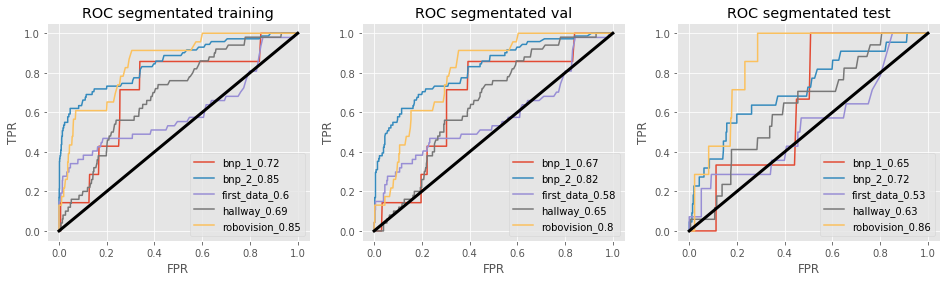

In [10]:
path = dict_data['path_o']


fig = plt.figure(figsize=(16, 4))


ax2 = plt.subplot(131)
for key in dict_data['dict_train'].keys():
    data = dict_data['dict_train'][key]
    ax2.plot(data[1], data[2], label=seg_english(key) + '_' + str(round(data[0], 2)))
ax2.plot([0,1],color = 'k',linewidth=3.0)

plt.legend(loc='lower right')
plt.title('ROC segmentated training')
plt.xlabel('FPR')
plt.ylabel('TPR')

ax3 = plt.subplot(132)
for key in dict_data['dict_val'].keys():
    data = dict_data['dict_val'][key]
    ax3.plot(data[1], data[2], label=seg_english(key) + '_' + str(round(data[0], 2)))
ax3.plot([0,1],color = 'k',linewidth=3.0 )

plt.legend(loc='lower right')
plt.title('ROC segmentated val')
plt.xlabel('FPR')
plt.ylabel('TPR')

ax4 = plt.subplot(133)
for key in dict_data['dict_test'].keys():
    data = dict_data['dict_test'][key]
    ax4.plot(data[1], data[2], label=seg_english(key) + '_' + str(round(data[0], 2)))
ax4.plot([0,1],color = 'k',linewidth=3.0 )

plt.legend(loc='lower right')
plt.title('ROC segmentated test')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.savefig('./plots/AFE/segmented_'+groupby+'.png',bbox_inches="tight")
plt.show()